## Linear Regression from scratch

The goal of this exercise is to implement the linear regression algorithm. 
The dataset is about predicting salary given gpa and years of experience. 
The steps to implement are as follows.  

1.	Read the data from a file (gpa_year_experience.csv)
2.	Scale the attributes
3.	Compute the error at each iteration and save the error values in vector
4.	Plot the error vector as a curve in the end
5.	Predict a new instance.
6.  Compare with SGDRegressor
7.  Create polynomial features and predict new instance   

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data and show first 5 rows
data = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/gpa_years_experience.csv')
data.head()

,gpa,years_of_experience,salary
0,70,1.0,50
1,80,2.0,55
2,65,2.0,45
3,70,2.5,60
4,65,2.7,58


In [3]:
# prepare data, split columns into X and y
# X should be a numpy array of shape (m, n), use .values to convert from dataframe to numpy array
# y should be a numpy array of shape (m,), use .values to convert from dataframe to numpy array

X = data.drop('salary', axis=1).values
X.shape

y = data["salary"].values
y.shape


(25,)

In [4]:
# extract m and n from X using X.shape[0] to get m and X.shape[1] to get n
m = X.shape[0]
n = X.shape[1]
m, n

(25, 2)

In [5]:
# y should be a numpy array of shape (m, 1), use reshape(m, 1) to reshape y from (m,) to (m, 1)
y = y.reshape(m, 1)
y.shape

(25, 1)

In [6]:
# normalize X using min-max scaler (sklearn.preprocessing.MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X)
X = scaler.fit_transform(X)
X


array([[0.3125 , 0.     ],
       [0.625  , 0.125  ],
       [0.15625, 0.125  ],
       [0.3125 , 0.1875 ],
       [0.15625, 0.2125 ],
       [0.625  , 0.25   ],
       [0.9375 , 0.25   ],
       [1.     , 0.275  ],
       [0.     , 0.3125 ],
       [0.3125 , 0.3375 ],
       [0.5    , 0.375  ],
       [0.78125, 0.4375 ],
       [0.625  , 0.5    ],
       [0.     , 0.5625 ],
       [0.125  , 0.6    ],
       [0.     , 0.625  ],
       [0.84375, 0.625  ],
       [0.9375 , 0.6875 ],
       [0.46875, 0.75   ],
       [0.625  , 0.75   ],
       [0.46875, 0.8125 ],
       [0.3125 , 0.875  ],
       [0.625  , 0.9375 ],
       [0.9375 , 0.9625 ],
       [0.78125, 1.     ]])

In [7]:
# add dummy feature to X using scikit-learn dummy feature (sklearn.preprocessing.add_dummy_feature)
from sklearn.preprocessing import add_dummy_feature
X = add_dummy_feature(X)
print(X[:5], "\n\n")
print(y[:5])

[[1.      0.3125  0.     ]
 [1.      0.625   0.125  ]
 [1.      0.15625 0.125  ]
 [1.      0.3125  0.1875 ]
 [1.      0.15625 0.2125 ]] 


[[50]
 [55]
 [45]
 [60]
 [58]]


In [8]:
# print shapes of X and y
# X should be (m, n+1) and y should be (m, 1)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (25, 3)
y shape: (25, 1)


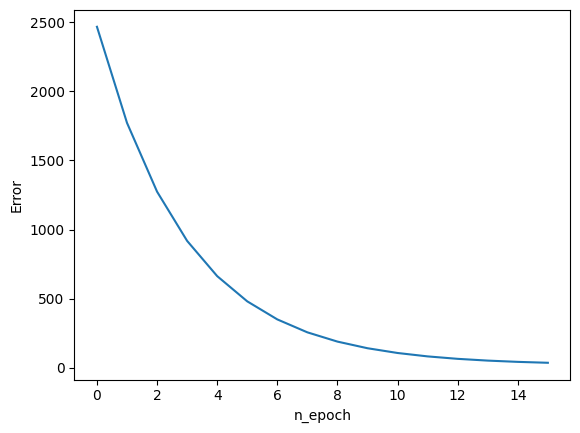

Final theta:
 [[41.9484149 ]
 [20.93916703]
 [23.86242076]]


In [9]:
eta = 0.1 # learning rate
n_epochs = 15
np.random.seed(42) # set random seed to 42 for reproducibility

# create theta, of shape (n+1, 1) and initialize it to random values using np.random.randn
theta = np.full(shape=[n+1, 1],
                fill_value=np.random.randn())

E = [] # list to store errors at each epoch
# compute error for initial theta and append to E
def compute_error(theta, X):
    error = np.sum((X @ theta), 1) 
    error = error.reshape(len(error), 1)
    return sum((error-y) * (error-y))/(2 * m)

E.append(compute_error(theta, X))
# loop over n_epochs
# for each epoch: compute gradients, update theta, compute error, append error to E
for i in range(0, n_epochs):
    theta -= (eta / m) * X.T @ (X @ theta - y)
    E.append(compute_error(theta, X))

# plot error vs epoch
plt.plot(E)
plt.xlabel("n_epoch")
plt.ylabel("Error")
plt.show()
# print final theta
print("Final theta:\n", theta)

In [10]:
# let's predict the salary for a person who has gpa=70 and years_of_experience=3. 
# create a numpy array x of shape (1, 2) with these values
# scale features using the same scaler we used earlier
# insert dummy feature using dummy feature function
# Predict salary of x
x = np.array([[70,3]])
x = scaler.transform(x)
x = add_dummy_feature(x)
print(sum( x @ theta))

[54.45750979]


In [11]:
# Let's compare with scikit-learn's SGDRegressor
# use SGDRegressor from scikit-learn to fit the data
# use max_iter=1000, eta0=0.1, random_state=42
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(alpha=0.1, random_state=42, max_iter=1000)
sgd_reg.fit(X, y)

SGDRegressor(alpha=0.1, random_state=42)

In [12]:
# predict salary of x using sgd
sgd_reg.predict(x)

array([62.504377])

In [13]:
# create polynomial features of degree 2 using scikit-learn PolynomialFeatures
# create X_poly using fit_transform
# create x_poly using transform
# fit the data using SGDRegressor
# predict salary of x using sgd
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
x_poly = poly.fit_transform(x)
sgd_poly = SGDRegressor()
sgd_poly.fit(X_poly, y)
sgd_poly.predict(x_poly)


array([59.48758531])